Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

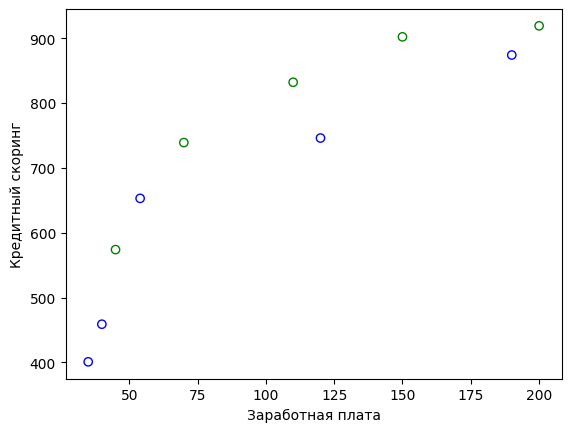

In [3]:
plt.scatter(zp, ks, c="w", edgecolors = ["b", "g"])
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг', rotation=90)
plt.show()

На графике видна линейная зависимость между зависимыми и независимыми данными вида y = b0 + b1*x,
или ks = b0 + b1*zp.
Найдем b1 и b0 вторым способом из презентации к 9 лекции стр.18:

$b1 = \frac{\bar{zp*ks}-\bar zp\cdot\bar ks}{\bar{zp^2}-{\bar zp}^2}$

$b0=\bar y-b\cdot\bar x=\bar{ks}-b\cdot\bar{zp}$

In [4]:
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b0 = np.mean(ks)-b1*np.mean(zp)
print(f"Интерсепт {b0:.2f} и Коэффициент линейной регрессии = {b1:.2f}")

Интерсепт 444.18 и Коэффициент линейной регрессии = 2.62


Следовательно график линейной функции с интерсептом B0:

$у=444.18+2.62x$

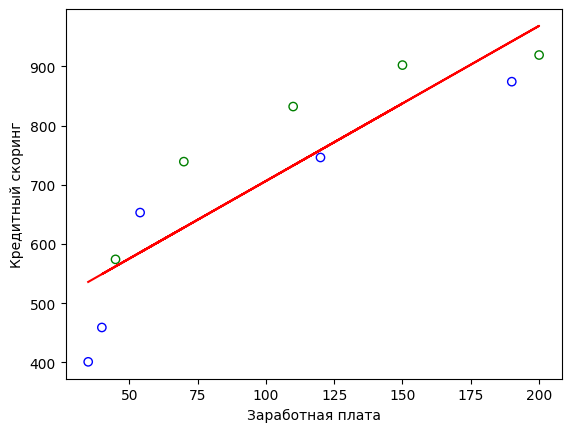

In [5]:
plt.scatter(zp, ks, c="w", edgecolors = ["b", "g"])
plt.plot(zp, b0+b1*zp, c='red')
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг', rotation=90)
plt.show()

Чтобы высчитать модель без интерсепта воспользуемся рекомендациями со страницы 18 текстовых лекций 9:

Перемножим матрицы без добавления столбца единиц.

$\begin{pmatrix}y_1\\y_2\\y_3\\\end{pmatrix}=\begin{pmatrix}x_1\\x_2\\x_3\\\end{pmatrix}\cdot\begin{pmatrix}\beta_1\end{pmatrix}$

формула перемножения матрицы стр.18 лекции 9:

$\hat{B} = (X^T * X)^{-1} * X^T * Y$



In [6]:
y=ks.reshape((-1,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [7]:
x=zp.reshape((-1,1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
b=np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
print(f"Коэффициент без интерсепта равен {b[0][0]:.2f}")

Коэффициент без интерсепта равен 5.89


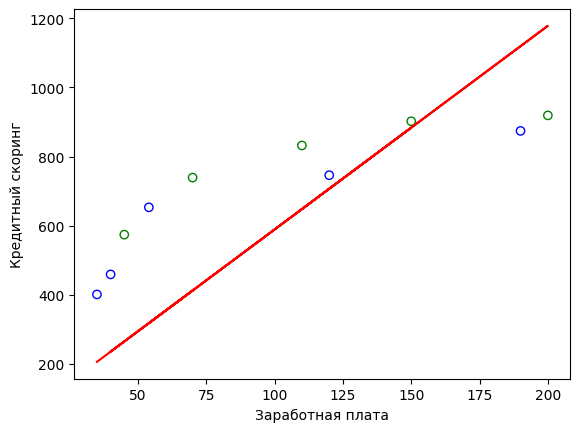

In [9]:
plt.scatter(zp, ks, c="w", edgecolors = ["b", "g"])
plt.plot(zp, b[0][0]*zp, c='red')
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг', rotation=90)
plt.show()